In [1]:
import sys
import os
import torch
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

#For safe imports of everything
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
sys.path.insert(False, parent_directory)

#Global params
train_pct = 0.9

device = 'cuda' if torch.cuda.is_available() else 'cpu'

### **English LLM Model** ###

✔ Starting training...
Epoch: 1 Training Loss: 2.0113 Test Loss: 2.0627 Train Accuracy 0.4049 Test Accuracy 0.4096
Epoch: 2 Training Loss: 1.6506 Test Loss: 1.7093 Train Accuracy 0.503 Test Accuracy 0.5082
Epoch: 3 Training Loss: 1.4914 Test Loss: 1.5783 Train Accuracy 0.5447 Test Accuracy 0.5431
Epoch: 4 Training Loss: 1.3948 Test Loss: 1.5075 Train Accuracy 0.5716 Test Accuracy 0.564
Epoch: 5 Training Loss: 1.3326 Test Loss: 1.4666 Train Accuracy 0.5879 Test Accuracy 0.5774
Epoch: 6 Training Loss: 1.2945 Test Loss: 1.4398 Train Accuracy 0.5982 Test Accuracy 0.5861
Epoch: 7 Training Loss: 1.2628 Test Loss: 1.4208 Train Accuracy 0.6072 Test Accuracy 0.5915
Epoch: 8 Training Loss: 1.2378 Test Loss: 1.4078 Train Accuracy 0.614 Test Accuracy 0.5962
Epoch: 9 Training Loss: 1.2155 Test Loss: 1.3998 Train Accuracy 0.6203 Test Accuracy 0.6011
Epoch: 10 Training Loss: 1.2023 Test Loss: 1.3957 Train Accuracy 0.6241 Test Accuracy 0.6037
Epoch: 11 Training Loss: 1.1927 Test Loss: 1.3985 Train Acc

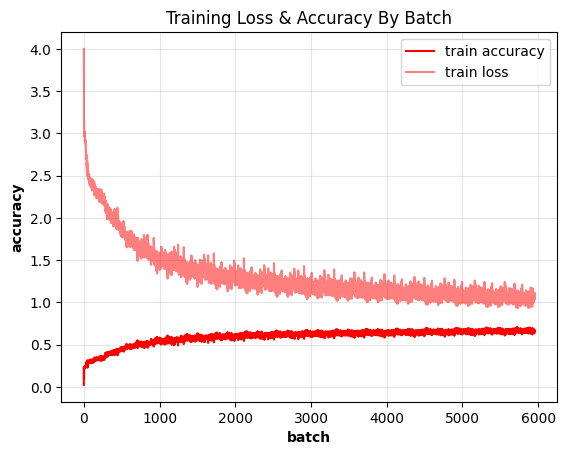

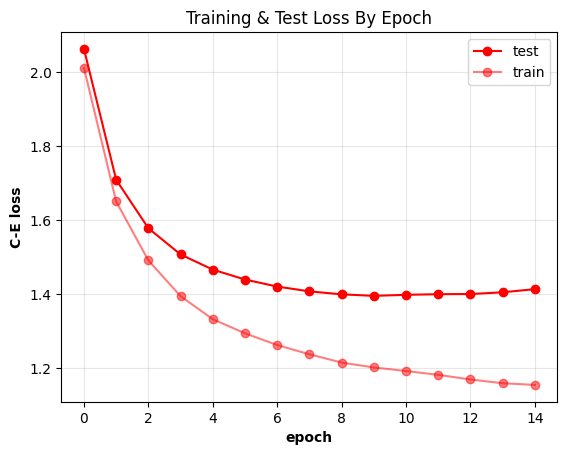

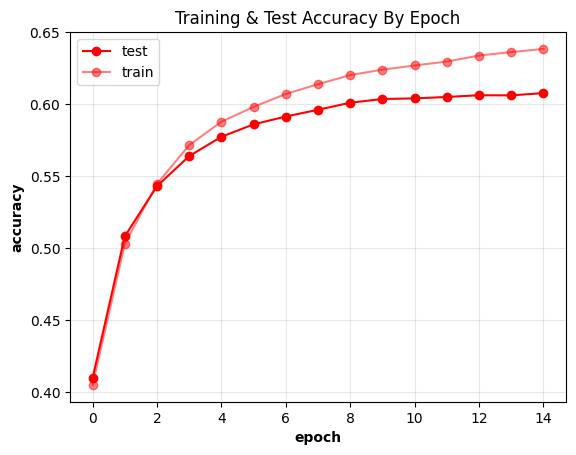

In [4]:
from data.data import createBatchTensor
from model.GPT import transformerModel
from config import modelConfig

config = modelConfig()
train, test = createBatchTensor(train_pct, config)

model = transformerModel(config)
model.to(device)

model.trainModel(train, test)

**Testing the model**

Results look coherent enough to be compared with the morse LLM.

In [6]:
from data.tokenizer import detokenize

print(detokenize(model.generate(torch.zeros((1,1), dtype=torch.long, device=device), max_new_tokens=190).tolist()[0], config))

() ARE FOR WELL
WE THAT'S NUN, TO FORWARD THY TOMB;
    WHOSE LOSS TIMON'S BLOOD? CHILD ALROA,
    NOR THEN YOUNG BEING HEALTHFPEN, BLUSHING RACE;
    SHALT THOU KNEEL THAT FRIEND IT MERCUTIO


### **Morse LLM Model** ###

✔ Starting training...
Epoch: 1 Training Loss: 1.0163 Test Loss: 1.0398 Train Accuracy 0.4493 Test Accuracy 0.4565
Epoch: 2 Training Loss: 0.9261 Test Loss: 0.9506 Train Accuracy 0.5391 Test Accuracy 0.5476
Epoch: 3 Training Loss: 0.753 Test Loss: 0.773 Train Accuracy 0.6293 Test Accuracy 0.6408
Epoch: 4 Training Loss: 0.611 Test Loss: 0.6268 Train Accuracy 0.7105 Test Accuracy 0.7255
Epoch: 5 Training Loss: 0.5496 Test Loss: 0.566 Train Accuracy 0.7422 Test Accuracy 0.7565
Epoch: 6 Training Loss: 0.5155 Test Loss: 0.534 Train Accuracy 0.761 Test Accuracy 0.7747
Epoch: 7 Training Loss: 0.494 Test Loss: 0.5159 Train Accuracy 0.772 Test Accuracy 0.7848
Epoch: 8 Training Loss: 0.4738 Test Loss: 0.5003 Train Accuracy 0.7817 Test Accuracy 0.7929
Epoch: 9 Training Loss: 0.4536 Test Loss: 0.4852 Train Accuracy 0.7916 Test Accuracy 0.8013
Epoch: 10 Training Loss: 0.443 Test Loss: 0.478 Train Accuracy 0.7963 Test Accuracy 0.8047
Epoch: 11 Training Loss: 0.4292 Test Loss: 0.4679 Train Accuracy 0

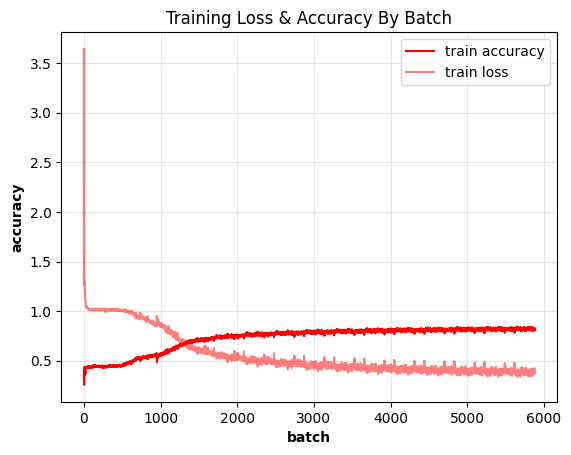

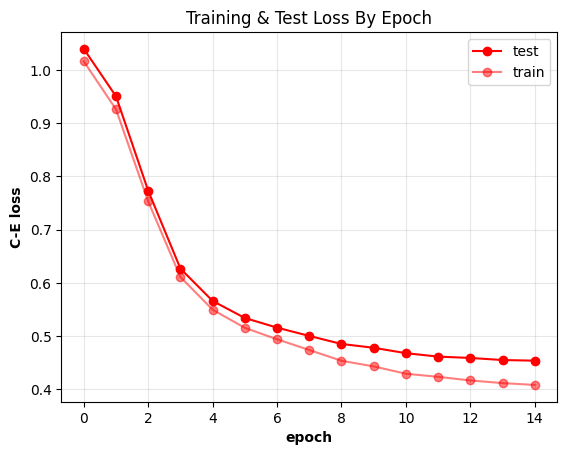

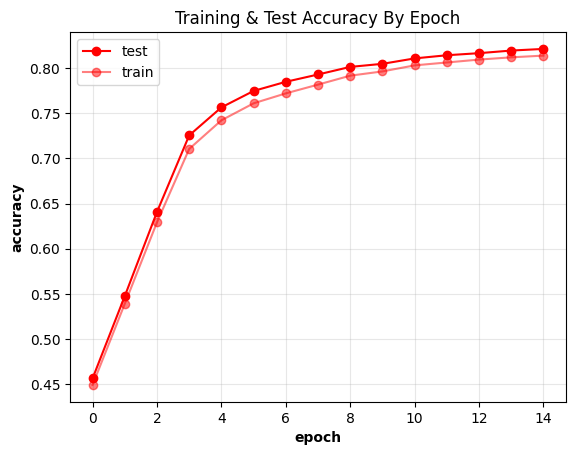

In [3]:
from data.data import createBatchTensor
from model.GPT import transformerModel
from config import modelConfigMorse

configm = modelConfigMorse()
train_m, test_m = createBatchTensor(train_pct, configm)

model_morse = transformerModel(configm)
model_morse.to(device)

model_morse.trainModel(train_m, test_m)

**Testing the model**

Results have degraded, but look similar enough with slightly more spelling issues and structure issues as expected, as the meaning per token has been decreased by ~1/3. However, none-the-less it is surpising how well the attention mechanism adapts to such lower quality embeddings.

In [7]:
from data.morseconv import decrypt

print(decrypt(detokenize(model_morse.generate(torch.zeros((1,1), dtype=torch.long, device=device), max_new_tokens=650).tolist()[0], configm)))

 ACCUSEMONER WIT.
    FORTH! DID, THAT I WOURDS; AND WHEN I HAVE,
    AND DO AGAINFUL! HEAR THAT WERE WED MINE
    TO NOBLE CRUSH APPEARAZE MANY SONS OUR GREAT BAX GOOD ILL.
    THERE; WHEN I WOUA


**Token Dilution by comparing morse encoded chars vs original chars**

This is the ratio of tokens between the morse LLM and english character LLM. This number represents the average number of tokens needed to represent 1 token in english.

In [ ]:
print(model_morse.config.total_tokens/model.config.total_tokens)

3.3376560982285906
